<a href="https://colab.research.google.com/github/heath-barnett/chem3020/blob/main/integrals_derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limits and Derivatives of Functions
# Basic Rules

Before we get into any rules for derivatives, let's remember what the [derivative](https://en.wikipedia.org/wiki/Derivative) means **conceptually**.

That's fairly easy to describe:

$$ slope = \frac{\Delta f}{\Delta x} = \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

The question that [Newton and Leibnitz](https://en.wikipedia.org/wiki/Calculus) used when establishing calculus - what happens as $\Delta x \rightarrow 0$?

A derivative is a fundamental concept in calculus that represents the rate of change of a function with respect to its input variable. In simpler terms, it tells us how much a function's output value changes when its input value changes slightly. The derivative of a function at a specific point gives us the instantaneous rate of change of the function at that point.

Mathematically, if you have a function f(x), the derivative f'(x) (also denoted as $\frac{dx}{df}$) represents the slope of the tangent line to the curve of the function at a given point x. It can be thought of as the "steepness" of the curve at that point.


# Notations
Calculus was derived independently by both Newton and Leibnitz - who used different notation. As a result, there are a few ways to indicate the "take a derivative" operation.

- $\frac{df}{dx}$ - Leibnitz
- $\dot f$ - Newton (a.k.a. 'f-dot')
- $f'$ - Lagrange (a.k.a. 'f-prime')
- $D_x f(x)$ - Euler

Similar notation exists for second derivatives, third derivatives, etc.:

- $\frac{d^2f}{dx^2}$ - Leibnitz
- $\ddot{f}, \dddot{f}$ - Newton
- $f''$ - Lagrange

I try and use Leibnitz exclusivly in class to help avoid confusion but Lagrange notation may crop up at times.

### Evaluating Derivatives

You *should* be able to do any of the following:

- Constants

$$\frac{d}{dx} c = 0$$

- Linear functions

$$\frac{d}{dx} ax + b = a$$

- Polynomials

$$\frac{d}{dx} x^3 + x^2 = 3x^2 + 2x$$

- Sum / Difference

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx}[f(x)] + \frac{d}{dx}[g(x)]$$

- Sine

$$\frac{d}{dx} \sin ax = a \cos ax$$

- Cosine

$$\frac{d}{dx} \cos ax = -a \sin ax$$

- Exponential

$$\frac{d}{dx} e^x = e^x$$

- Log

$$\frac{d}{dx} \log x = \frac{1}{x} $$

- Powers a<sup>x</sup>

$$\frac{d}{dx} a^x = a^x \ln a$$

- Chain Rule

$$\frac{d}{dx} f(g(x)) = \frac{df}{dg}\frac{dg}{dx}$$

>For example:

$$\frac{d}{dx} e^{ax^2} = 2axe^{ax^2}$$

- Product Rule

$$
\frac{d}{d x}[f(x) g(x)]=f(x) \frac{d g}{d x}+g(x) \frac{d f}{d x}
$$

- Quotient Rule

$$
d\left(\frac{u}{v}\right)=\frac{v d u-u d v}{v^{2}}
$$

Note that the "quotient rule" can also be considered as a combination of the product rule and chain rule that are easier to remember:

$$
\begin{aligned} \frac{d}{d x}\left[\frac{f(x)}{g(x)}\right] &=\frac{1}{g(x)} \frac{d f}{d x}+f(x) \frac{d}{d x}\left[\frac{1}{g(x)}\right] \\ &=\frac{1}{g^{2}(x)} g(x) \frac{d f}{d x}+f(x)\left[-\frac{1}{g^{2}(x)} \frac{d g}{d x}\right] \\ &=\frac{1}{g^{2}(x)}\left[g(x) \frac{d f}{d x}-f(x) \frac{d g}{d x}\right] \end{aligned}
$$

### Second derivatives, etc.

You should remember that second derivatives are just repeated application of the rules:

$$\frac{d^2}{dx^2}[x^2] = \frac{d}{dx}[2x] = 2$$

# Limits and Derivatives in Sympy

Take derivatives with the `diff(expr,var)` function.

where expr is the function/expression and var is the variable you taking the derivative with.

Multiple derivatives can be taken by passing a

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

In [17]:
f = 3*x**2
display(f)
print()
diff(f,x)

   2
3⋅x 

6⋅x

diff can take multiple derivatives at once. To take multiple derivatives, pass the variable as many times as you wish to differentiate, or pass a number after the variable. For example, both of the following find the third derivative of $x^4$


In [16]:
f = x**4
display(f)
print()
display(diff(f,x,x,x))
print()
display(diff(f,x,3))

 4
x 

24⋅x

24⋅x

To create an unevaluated derivative (this has uses later), use the Derivative class. It has the same syntax as diff. To evaluate it, use `.doit()`.

In [15]:
f = sin(x)/x
deriv = Derivative(f, x)
display(deriv)
print()
display(deriv.doit())
all = Eq(deriv,deriv.doit())
print()
display(all)

d ⎛sin(x)⎞
──⎜──────⎟
dx⎝  x   ⎠

cos(x)   sin(x)
────── - ──────
  x         2  
           x   

d ⎛sin(x)⎞   cos(x)   sin(x)
──⎜──────⎟ = ────── - ──────
dx⎝  x   ⎠     x         2  
                        x   

### Plot Your Derivatives

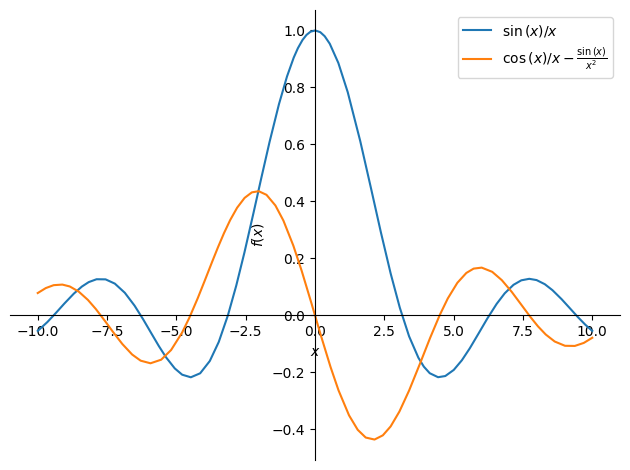

In [24]:
f = sin(x)/x
deriv = Derivative(f, x)
plot(f,deriv.doit(),legend=True)

# Limits with Sympy
SymPy can compute symbolic limits with the limit function. We will not need to compute limits often in physical chemistry, since derivatives of most well behaved functions are also their limits. However, in the few cases where we will need to the syntax to compute a limit is straightforward.

$$ \lim_{x\rightarrow 0^+}\left(\frac{sin(x)}{x}\right)$$

In [11]:
f = sin(x)/x
limit(f, x, 0)

1

Like `Derivative` and `Integral`, `limit` has an unevaluated counterpart, `Limit`. To evaluate it, use `.doit()`.

In [9]:
expr = Limit((cos(x) - 1)/x, x, 0)
display(expr)
print()
expr.doit()

     ⎛cos(x) - 1⎞
 lim ⎜──────────⎟
x─→0⁺⎝    x     ⎠

0

### Integrals and Antiderivatives

The integral of a function is literally written as the area under the curve. That is, if we want the area under $f(x)$ from $a$ to $b$, we can divide it up into a bunch of little rectangles: $x_{0}=a<x_{1}<\cdots<x_{N}=b$

$$
\int_{a}^{b} f(x) d x=\lim _{N \rightarrow \infty} \sum_{i=1}^{N} f\left(x_{i}^{*}\right)\left(x_{i}-x_{i-1}\right)
$$

Notice that the product $f(x_i^ * ) (x_i - x_{i-1})$ for each $i$ is the area of a rectangle of height $f(x_i^ * )$ and width $x_i - x_{i-1}$. We can think of these "Riemann sums" as the area of $N$ rectangles with heights determined by the graph of $y=f(x)$.

(We can use this definition to calculate numerical integrals if we cannot determine the exact expression of an integral.)

One question is often how this area under a curve connects with derivatives. After all, the derivative is the tangent to the curve at a particular point. What's the connection?

This connection is actually so important, it's called the [Fundamental Theorem of Calculus](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus).

$$
 f(x) = \frac{A(x + dx) - A(x)}{dx}
$$

Or, put another way, $A(x)$ is the antiderivative of $f(x)$.

### Evaluating Integrals

We'll discuss ***numeric*** integration later. Suffice to say that some times we don't have good ways to get an analytical formula for an integral.

Let's start with derivatives, which we know:

$$
\frac{d}{d x} f(x)=\frac{df(x)}{dx} = f^{\prime}(x)
$$

We saw the total differential as well - the change in the function vs. the change in the $x$ value:

$$
d f(x)=f^{\prime}(x) d x
$$

So for any case where we know the derivative, we can set up known integrals:

$$
f(x)=\int d f(x)=\int f^{\prime}(x) d x
$$

#### Some Review of Common Integrals

- Integration of a constant:

$$
\int a d x=a \int d x=a x+C
$$

Note this also means that the integral of a constant times a function can be evaluated by taking the constant 'out front'.

- Polynomials / powers:

$$
\int x^{n} d x=\frac{1}{n+1} x^{n+1}+C \quad n \neq-1
$$

- 1/x (i.e., what to do for $x^{-1}$ above

$$
\int \frac{1}{x} d x=\ln x+C
$$

- Integral of sums:

Much like derivatives, when we have multiple terms in an integral, we can integrate each part separately:

$$
\int[f(x)+g(x)] d x=\int f(x) d x+\int g(x) d x
$$

- Exponential:

Borrowing from derivatives, the integral of $e^x$ will be $e^x$

$$
\int e^{a x} d x=\frac{1}{a} e^{a x}+C
$$

- Sines and Cosines:

$$
\begin{array}{l}
\int \sin (a x) d x=-\frac{1}{a} \cos (a x)+C \\
\int \cos (a x) d x=\frac{1}{a} \sin (a x)+C
\end{array}
$$

These are the main integrals you should know. There are a few tools to integrate more complicated integrals, and there are some known *definite* integrals.
    
Beyond that, there are a few other ways to evaluate more complicated integrals:
- substitution of variables
- some functions (even very complicated ones) have known integrals that can be found on texts
- some integrals have no known formula, but are important enough to create "special functions" (e.g., the [error function erf(x)](https://en.wikipedia.org/wiki/Error_function)
- use computer algebra / calculus tools like Mathematica or Sympy which will use combinations of these techniques
- give up and perform numeric integration

Back in the ye old days you had two options:

1. Learn calculus and do these things by hand.
2. Purchase a very expensive book of derivatives and integrals and hope that you could use it on exams.

Since I am old, I can actually perform (some) derivatives and integrals in my head or with a bit of pen and paper.
    
Truthfully though, I do most of them with Sympy or Wolfram Alpha.

I want you to concentrate more on concepts than on "can you do integral substitutions by hand" in this class. This does not alleviate you from understanding what you are doing. Sympy is a powerful tool, but in the hands of a moron it is useless.

